## 6.4. Machine Learning. Regression Analysis


In [3]:
### Import libraries and data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
%matplotlib inline

In [5]:
### Set path
path=r'C:\Users\User\Downloads\Achievement 6'

In [6]:
### Import data set
df=pd.read_csv(os.path.join(path, 'Data',  'flavors_of_cacao_cleaned.csv'))

In [7]:
df.head()

,Unnamed: 0,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Broad Bean Origin
0,0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Sao Tome
1,1,A. Morin,Kpime,1676,2015,70.0,France,2.75,Togo
2,2,A. Morin,Atsane,1676,2015,70.0,France,3.00,Togo
3,3,A. Morin,Akata,1680,2015,70.0,France,3.50,Togo
4,4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Peru


#### The data is already cleaned and ready for the future analysis

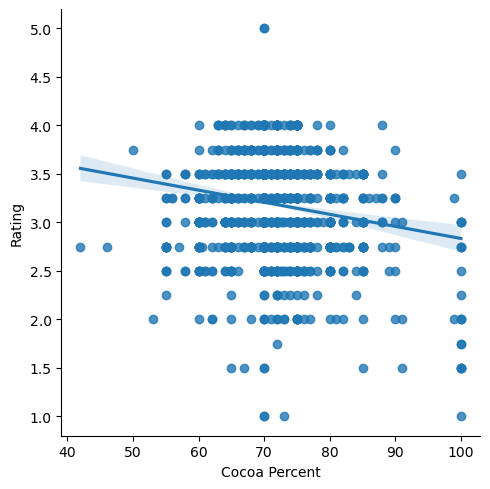

In [8]:
### Creating a scatterplot for the "Cocoa percent" and "Rating" columns
scatterplot=sns.lmplot(x = 'Cocoa Percent', y = 'Rating', data = df)

### hypothesis: Chocolates with more cocoa percent get lower ratings

In [9]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Cocoa Percent'].values.reshape(-1,1)
y = df['Rating'].values.reshape(-1,1)

In [10]:
X

array([[63.],
       [70.],
       [70.],
       ...,
       [70.],
       [72.],
       [70.]], shape=(1794, 1))

In [11]:
y

array([[3.75],
       [2.75],
       [3.  ],
       ...,
       [3.75],
       [3.75],
       [4.  ]], shape=(1794, 1))

In [12]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression analysis

In [13]:
# Create a regression object.

regression = LinearRegression() 

In [14]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [15]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

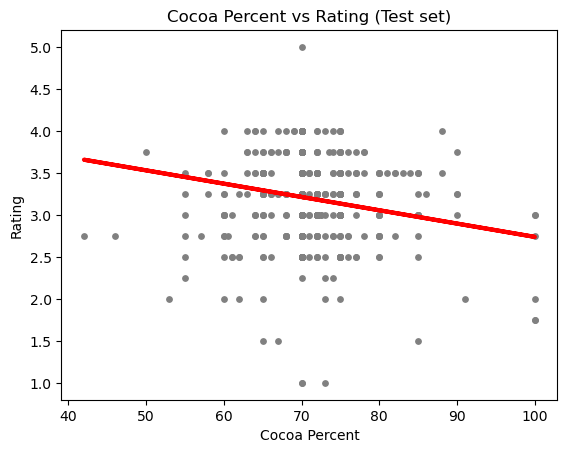

In [16]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Cocoa Percent vs Rating (Test set)')
plot_test.xlabel('Cocoa Percent')
plot_test.ylabel('Rating')
plot_test.show()

 ### the regression line suggests a negative correlation between cocoa percentage and rating, meaning that as the cocoa content increases, the rating tends to decrease. However, the fit does not appear strong. 

In [17]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [18]:
# Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.01584587]]
Mean squared error:  0.2571105788775762
R2 score:  -0.012969926089159367


### The summary statistics suggest that the linear regression model is not a good fit for predicting ratings based on cocoa percentage.
### Slope (-0.0158): This confirms a weak negative relationship between cocoa percentage and rating.
### A negative R2 (-0.013) suggests that the model is performing worse than a simple average of the ratings. 

In [19]:
### Making a dataframe of y values and their predicted values.
y_predicted

array([[3.21362379],
       [3.37208247],
       [3.21362379],
       [3.21362379],
       [3.21362379],
       [3.18193205],
       [3.05516511],
       [3.13439445],
       [2.88086056],
       [3.10270271],
       [3.21362379],
       [3.16608619],
       [3.24531553],
       [3.21362379],
       [3.21362379],
       [3.15024032],
       [3.21362379],
       [3.13439445],
       [3.13439445],
       [3.16608619],
       [3.18193205],
       [3.21362379],
       [3.18193205],
       [3.13439445],
       [3.21362379],
       [3.08685684],
       [3.13439445],
       [3.13439445],
       [3.21362379],
       [3.21362379],
       [3.37208247],
       [3.21362379],
       [3.26116139],
       [3.21362379],
       [3.21362379],
       [3.3562366 ],
       [3.21362379],
       [3.13439445],
       [3.18193205],
       [3.24531553],
       [2.92839816],
       [3.24531553],
       [3.13439445],
       [3.21362379],
       [3.29285313],
       [3.13439445],
       [2.97593577],
       [3.213

In [25]:

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3.50,3.213624
1,3.25,3.372082
2,3.50,3.213624
3,3.25,3.213624
4,3.75,3.213624
5,3.50,3.181932
6,3.50,3.055165
7,4.00,3.134394
8,2.00,2.880861
9,2.50,3.102703


### there’s quite the difference between the actual and predicted y values. This just adds evidence to the fact that my model isn’t doing a great job of explaining the relationship between the “Cocoa Percent” and “Rating” variables. 